# Snapp/Tapsi Ride Analysis

In [48]:
df = pd.read_csv("results.csv")
df.shape

(2508, 7)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display
from datetime import datetime, time

In [49]:
df.describe()

,snapp,tapsi
count,1679.000000,2508.000000
mean,129049.136391,108074.162679
std,23470.236982,23416.846626
min,89000.000000,69000.000000
25%,110500.000000,90000.000000
50%,123500.000000,103000.000000
75%,146000.000000,121000.000000
max,204500.000000,225000.000000


Filter by **bothOK**

In [50]:
mask = df['bothOK'] == True
filtered_df = df[mask]
print(filtered_df.shape)
df = filtered_df

(1679, 7)


Filter by weekdays

In [51]:
excluded_dates = ['2023-06-05', '2023-06-04', '2023-06-02', '2023-06-01', '2023-05-26', '2023-05-25']
filtered_df = df[~df['date'].isin(excluded_dates)]
print(filtered_df.shape)
df = filtered_df

(1139, 7)


Filter by time

In [52]:
df['time_column'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
lower_bound = time(19, 0, 0)
upper_bound = time(21, 30, 0)
filtered_df = df[(df['time_column'] >= lower_bound) & (df['time_column'] <= upper_bound)]
print(filtered_df.shape)
df = filtered_df

(491, 8)


In [53]:
df.sample(20)

,district,snapp,tapsi,time,date,day,bothOK,time_column
497,شقایق شمالی,149500.0,142000,19:20:24,2023-05-30,Tuesday,True,19:20:24
715,اباذر پردیس زندگی,178500.0,168000,19:05:51,2023-05-31,Wednesday,True,19:05:51
327,ستاری کورش,157000.0,132000,20:20:14,2023-05-29,Monday,True,20:20:14
32,کاشانی سر جنت,143000.0,128000,19:44:24,2023-05-28,Sunday,True,19:44:24
304,میدون سازمان برنامه,126000.0,123000,19:45:46,2023-05-29,Monday,True,19:45:46
81,فردوس شقایق,126500.0,115000,20:53:17,2023-05-28,Sunday,True,20:53:17
727,اباذر پردیس زندگی,182500.0,167000,19:20:28,2023-05-31,Wednesday,True,19:20:28
305,شقایق شمالی,153000.0,124000,19:45:51,2023-05-29,Monday,True,19:45:51
25,باغ فیض هجرت,138000.0,123000,19:43:59,2023-05-28,Sunday,True,19:43:59
1576,میدون سازمان برنامه,117000.0,90000,20:20:12,2023-06-03,Saturday,True,20:20:12


    ## Group by Time (30-min frame)

In [54]:
df['time'] = pd.to_datetime(df['time'])
df_grouped = df.groupby(pd.Grouper(key='time', freq='30min')).agg({'snapp': 'mean', 'tapsi': 'mean'}).reset_index()
df_grouped

,time,snapp,tapsi
0,2023-06-07 19:00:00,141542.016807,128638.655462
1,2023-06-07 19:30:00,144218.750000,137250.000000
2,2023-06-07 20:00:00,149880.208333,136322.916667
3,2023-06-07 20:30:00,136324.074074,116120.370370
4,2023-06-07 21:00:00,137537.500000,106058.333333


In [55]:
df_grouped.shape

(5, 3)

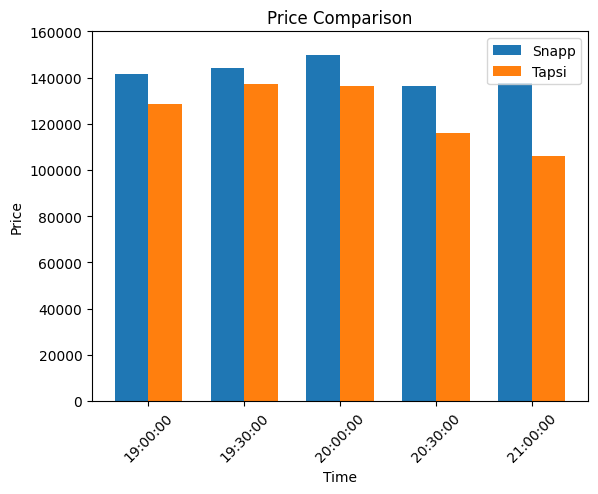

In [56]:
# Set up the figure and axes
fig, ax = plt.subplots()

# Calculate the bar width and bar positions
bar_width = 0.35
bar_position = np.arange(len(df_grouped['time']))

# Plot the bar chart for 'price1' and 'price2'
ax.bar(bar_position - bar_width/2, df_grouped['snapp'], width=bar_width, align='center', label='Snapp')
ax.bar(bar_position + bar_width/2, df_grouped['tapsi'], width=bar_width, align='center', label='Tapsi')

# Set the y-axis limits
ax.set_ylim(0, 160000)

# Set the x-axis tick positions and labels
ax.set_xticks(bar_position)
ax.set_xticklabels(df_grouped['time'].dt.time, rotation=45)

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Price Comparison')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Group by Location

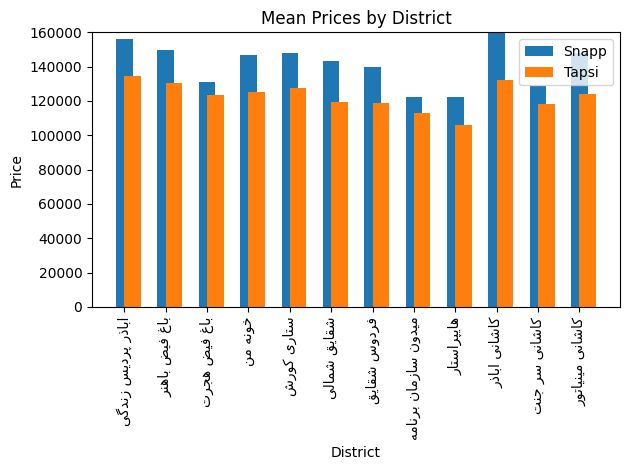

In [59]:
# Group data by 'district' and calculate the mean of 'price1' and 'price2'
df_grouped = df.groupby('district').agg({'snapp': 'mean', 'tapsi': 'mean'}).reset_index()

# Set up the figure and axes
fig, ax = plt.subplots()

# Get the x-axis positions for the bars
x_pos = range(len(df_grouped['district']))

# Plot the bar chart for mean prices
ax.bar(x_pos, df_grouped['snapp'], width=0.4, align='center', label='Snapp')
ax.bar(x_pos, df_grouped['tapsi'], width=0.4, align='edge', label='Tapsi')

# Set the x-axis tick positions and labels
ax.set_xticks(x_pos)

# Reshape and bidi-wrap the Arabic text
persian_labels = [get_display(arabic_reshaper.reshape(label)) for label in df_grouped['district']]
ax.set_xticklabels(persian_labels, rotation=90)

# Set the labels and title
ax.set_xlabel('District')
ax.set_ylabel('Price')
ax.set_title('Mean Prices by District')
ax.legend()

# Set the y-axis limits
ax.set_ylim(0, 160000)

# Display the plot
plt.tight_layout()
plt.show()

## Group by Day

/var/folders/9b/1jgyjhd92f1bj5gtpnw2bct00000gn/T/ipykernel_92935/2556645897.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('date').mean()


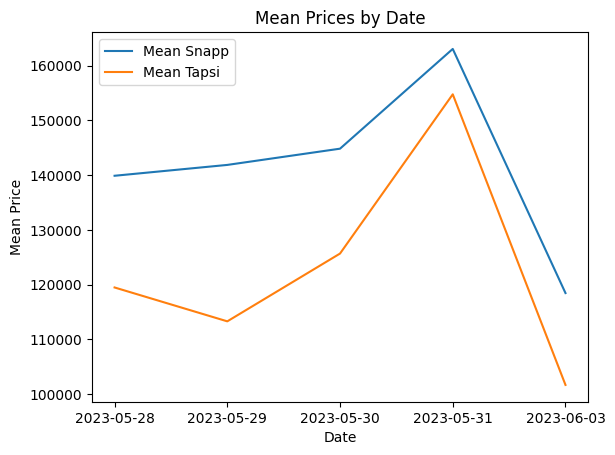

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with 'date', 'price1', and 'price2' columns

# Convert 'date' column to datetime data type
#df['date'] = pd.to_datetime(df['date'])

# Group data by 'date' and calculate the mean
df_grouped = df.groupby('date').mean()

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the mean values for 'price1' and 'price2'
ax.plot(df_grouped.index, df_grouped['snapp'], label='Mean Snapp')
ax.plot(df_grouped.index, df_grouped['tapsi'], label='Mean Tapsi')

# Set the labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Prices by Date')
ax.legend()

# Display the plot
plt.show()